In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Step 2: Load dataset (update path as needed)
df = pd.read_csv('/Users/jimitpatel/Downloads/customer_churn_data.csv')
print(df.head())
print(df.info())
print(df['Churn'].value_counts())

  customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0   CUST0000    Male              0      No        Yes      23           No   
1   CUST0001  Female              0     Yes         No      43           No   
2   CUST0002    Male              1      No         No      51          Yes   
3   CUST0003    Male              1      No         No      72          Yes   
4   CUST0004    Male              1      No         No      25          Yes   

      MultipleLines InternetService       OnlineSecurity  ...  \
0  No phone service              No  No internet service  ...   
1  No phone service             DSL                  Yes  ...   
2                No             DSL                   No  ...   
3               Yes             DSL                  Yes  ...   
4               Yes             DSL                   No  ...   

      DeviceProtection          TechSupport          StreamingTV  \
0  No internet service  No internet service  No internet service  

In [3]:
# Step 3: Clean 'TotalCharges' column
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

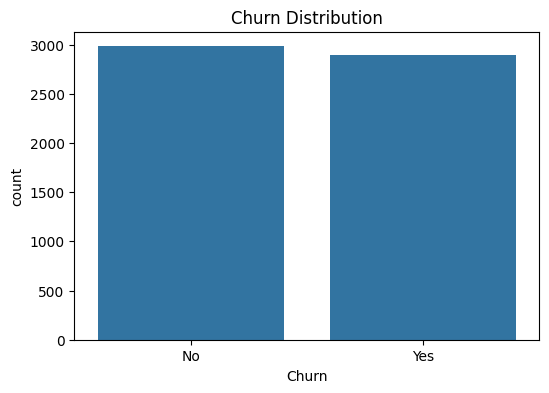

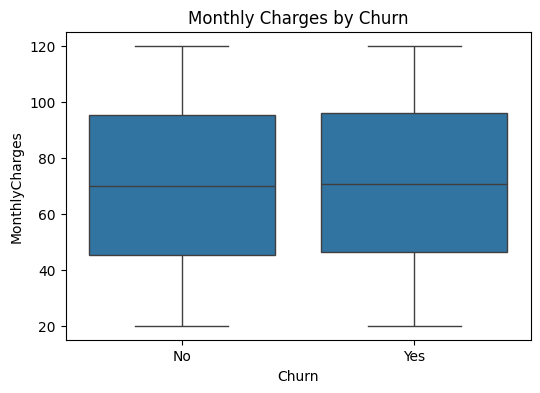

In [4]:
# Step 4: EDA – visualize churn
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

# Visualize MonthlyCharges by churn
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn')
plt.show()

In [5]:
# Step 5: Encode categorical features
cat_cols = df.select_dtypes(include=['object']).columns.drop(['customerID', 'Churn'])
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Convert target variable
df['Churn'] = df['Churn'].map({'No':0, 'Yes':1})

In [6]:
# Step 6: Prepare data for modeling
X = df.drop(['customerID','Churn'], axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    test_size=0.2, random_state=42)

In [7]:
# Step 7: Train RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
# Step 8: Evaluate model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.46343537414965985

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.49      0.48       596
           1       0.45      0.44      0.45       580

    accuracy                           0.46      1176
   macro avg       0.46      0.46      0.46      1176
weighted avg       0.46      0.46      0.46      1176


Confusion Matrix:
 [[291 305]
 [326 254]]
